# TF Syntax Basics
## Preparing the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('DATA/fake_reg.csv')

In [5]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

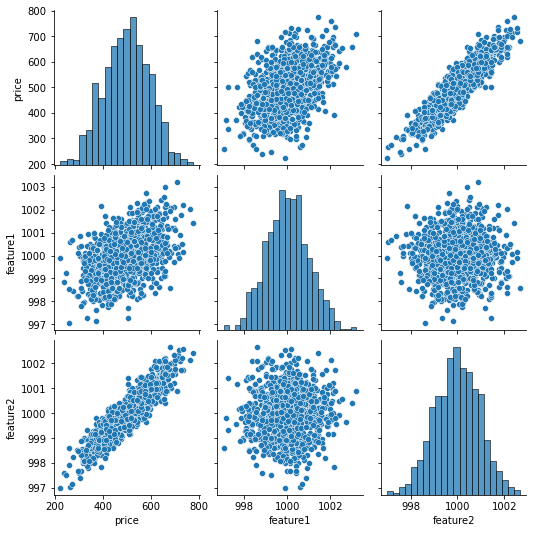

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1','feature2']].values

In [9]:
y = df['price'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#help(MinMaxScaler)

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
#X_train.min()

## Creating and Training the Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#help(Sequential)
#help(Dense)

In [22]:
model = Sequential([Dense(4, activation='relu'),
                   Dense(2, activation='relu'),
                   Dense(1)])

In [23]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [24]:
model.fit(x=X_train, y=y_train, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 1ms/step - loss: 256651.6406
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 256514.8750
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 256369.2969
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 256193.5938
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 255986.9688
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 255744.4844
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 255459.2656
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 255128.6406
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 254746.5312
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 254304.4531
Epoch 11/200
22/22 [==============================] - 0s 1ms/step - loss: 253795.8125
Epoch 12/200
22/22 [==============================] - 0s 1ms/st

In [25]:
lose_df = pd.DataFrame(model.history.history)

In [26]:
lose_df.plot()

<AxesSubplot:>

# Model Evaluation

In [27]:
model.evaluate(X_test, y_test, verbose=0)

25.56092643737793

In [28]:
model.evaluate(X_train, y_train, verbose=0)

23.837066650390625

In [29]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [30]:
# test_predictions

In [31]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [32]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [33]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [34]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [35]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.074978838479567

In [38]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [39]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.055782062954783

In [40]:
new_gem = [[998,1000]]

In [41]:
new_gem = scaler.transform(new_gem)

In [42]:
model.predict(new_gem)

1/1 [==============================] - 0s 15ms/step


array([[420.20874]], dtype=float32)

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model.save('my_gem_model.h5')

In [45]:
later_model = load_model('my_gem_model.h5')

In [46]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 43ms/step


array([[420.20874]], dtype=float32)